# Chapter 6, Example 4a

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.regularizers import l2
import tensorflow.keras.datasets.mnist as mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
batch_size = 128
num_classes = 10
no_epochs = 20

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(625, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(100, activation='relu', kernel_regularizer=l2(0.01)),
  Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=2,
                    use_multiprocessing=True,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 9s - loss: 9.0563 - accuracy: 0.7540 - val_loss: 7.8269 - val_accuracy: 0.8758
Epoch 2/20
60000/60000 - 8s - loss: 7.1531 - accuracy: 0.8820 - val_loss: 6.4945 - val_accuracy: 0.8982
Epoch 3/20
60000/60000 - 9s - loss: 5.9770 - accuracy: 0.8992 - val_loss: 5.4524 - val_accuracy: 0.9105
Epoch 4/20
60000/60000 - 9s - loss: 5.0298 - accuracy: 0.9060 - val_loss: 4.5985 - val_accuracy: 0.9133
Epoch 5/20
60000/60000 - 9s - loss: 4.2506 - accuracy: 0.9109 - val_loss: 3.8944 - val_accuracy: 0.9176
Epoch 6/20
60000/60000 - 8s - loss: 3.6063 - accuracy: 0.9148 - val_loss: 3.3087 - val_accuracy: 0.9202
Epoch 7/20
60000/60000 - 8s - loss: 3.0729 - accuracy: 0.9174 - val_loss: 2.8244 - val_accuracy: 0.9235
Epoch 8/20
60000/60000 - 8s - loss: 2.6306 - accuracy: 0.9197 - val_loss: 2.4238 - val_accuracy: 0.9243
Epoch 9/20
60000/60000 - 8s - loss: 2.2637 - accuracy: 0.9219 - val_loss: 2.0907 - val_accuracy: 0.9245
Epoch 10/20
60

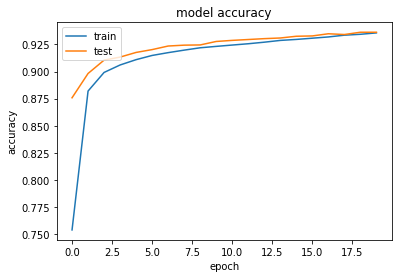

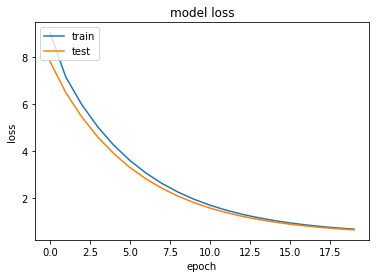

In [6]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()